In [1]:
# this is the accompanying library which we wrote
import multi_regressor as mlr

In [2]:
import pandas as pd

In [22]:
import numpy as np

In [3]:
df = pd.read_csv("BDM_cleaned.csv")

In [4]:
df.head()

Quarter  inf_mort_rate  birth_tot  birth_rate  year
0  1960-01-01           34.7      14614        20.6  1960
1  1960-04-01           26.8      16494        23.1  1960
2  1960-07-01           26.3      15612        22.2  1960
3  1960-10-01           29.7      14010        19.8  1960
4  1961-01-01           34.9      14692        20.8  1961

Quarter here has reverted back to a regular attribute and we have the standard positional index again. Let's convert Quarter back to the datetime index.

In [5]:
df.Quarter = pd.to_datetime(df.Quarter)
df.set_index('Quarter', inplace=True)

In [6]:
df.head()

inf_mort_rate  birth_tot  birth_rate  year
Quarter                                               
1960-01-01           34.7      14614        20.6  1960
1960-04-01           26.8      16494        23.1  1960
1960-07-01           26.3      15612        22.2  1960
1960-10-01           29.7      14010        19.8  1960
1961-01-01           34.9      14692        20.8  1961

Now we can convert this to POSIX time, split into training and testing sets and begin checking the different ML algorithms.

## X as seconds only

In [7]:
X = df.index.strftime("%s").astype("int").values.reshape(-1,1)
y = df.birth_tot

Path to save plot: 


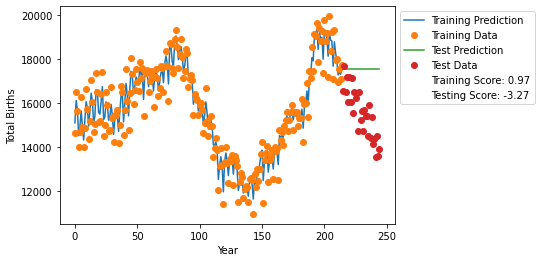

In [8]:
mlr.forest(X, y)

Path to save plot: 


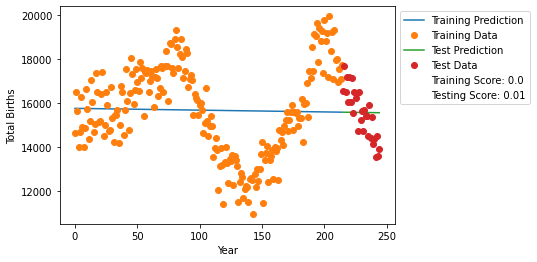

In [9]:
mlr.linear(X, y)

Path to save plot: 


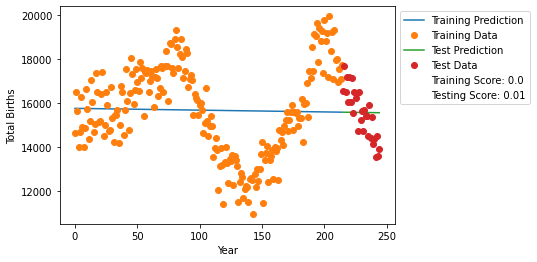

In [10]:
mlr.ridge(X, y)

Path to save plot: 


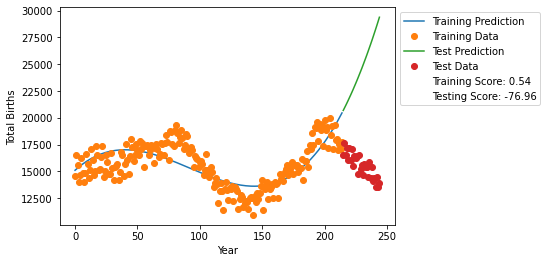

In [11]:
mlr.polynomial(X, y, degree=3)

Path to save plot: 


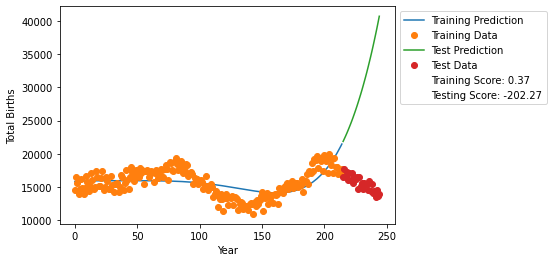

In [12]:
mlr.polynomial(X, y, degree=5)

Path to save plot: 


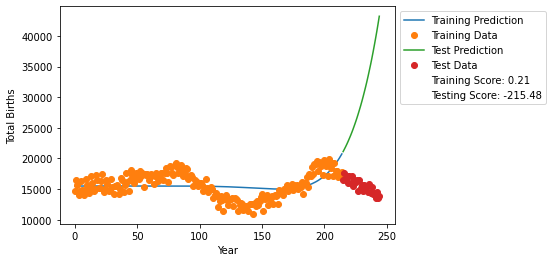

In [13]:
mlr.polynomial(X, y, degree=7)

## X as quarters only

In [14]:
X_q = df.index.quarter.values.reshape(-1,1)

Path to save plot: 


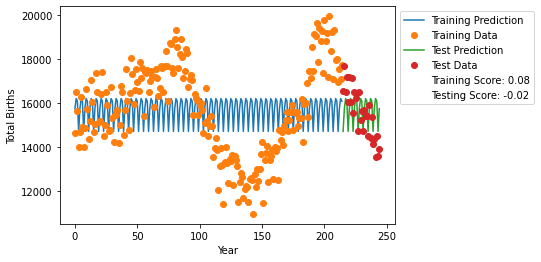

In [15]:
mlr.forest(X_q, y)

Path to save plot: 


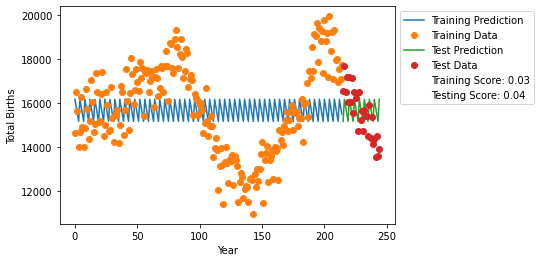

In [16]:
mlr.linear(X_q, y)

Path to save plot: 


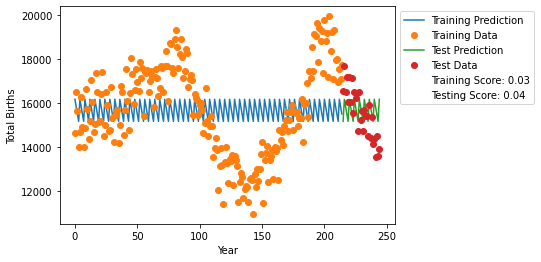

In [17]:
mlr.ridge(X_q, y)

Path to save plot: 


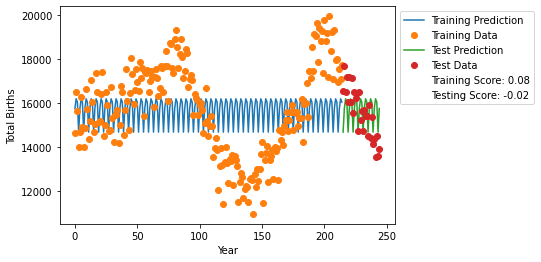

In [18]:
mlr.polynomial(X_q, y)

Path to save plot: 


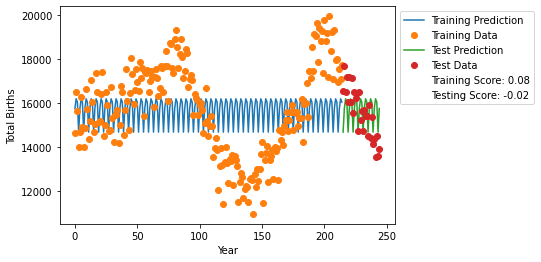

In [19]:
mlr.polynomial(X_q, y, degree=5)

Path to save plot: 


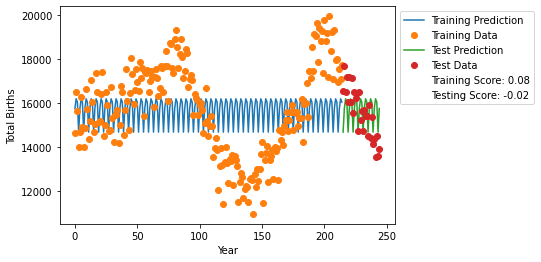

In [20]:
mlr.polynomial(X_q, y, degree=7)

## X as quarters and years

In [24]:
X_qy = np.hstack([df.index.year.values.reshape(-1,1),
                  df.index.quarter.values.reshape(-1,1)])

Path to save plot: 


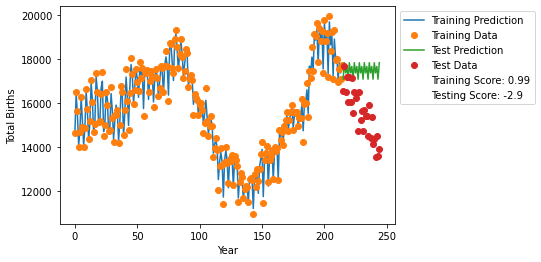

In [25]:
mlr.forest(X_qy, y)

Path to save plot: 


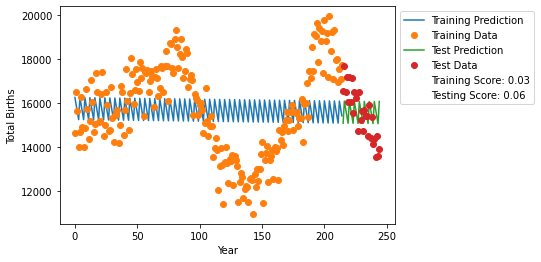

In [26]:
mlr.linear(X_qy, y)

Path to save plot: 


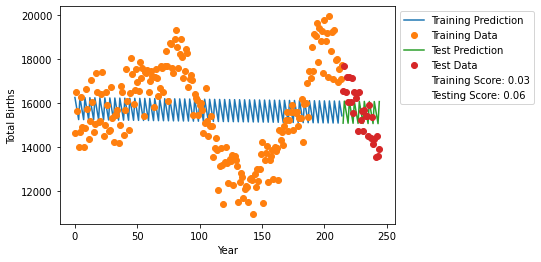

In [27]:
mlr.ridge(X_qy, y)

Path to save plot: 


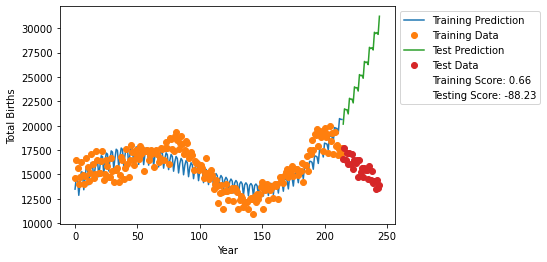

In [28]:
mlr.polynomial(X_qy, y)

Path to save plot: 


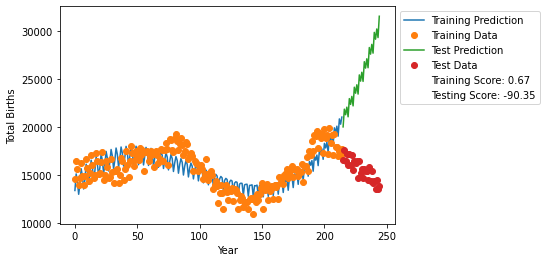

In [29]:
mlr.polynomial(X_qy, y, degree=5)

Path to save plot: 


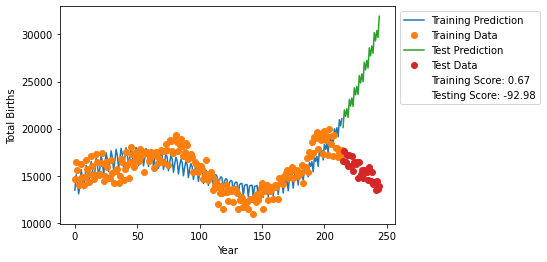

In [30]:
mlr.polynomial(X_qy, y, degree=7)

## One Hot Encoded X where X is seconds only

In [31]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [32]:
X_oh = enc.fit_transform(X).toarray()

Path to save plot: 


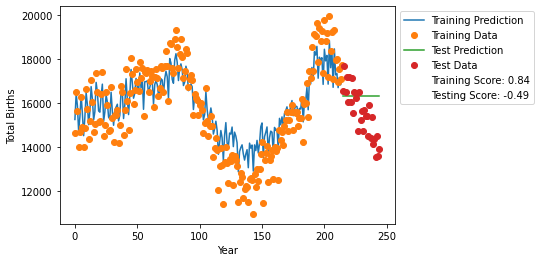

In [33]:
mlr.forest(X_oh, y)

Path to save plot: 


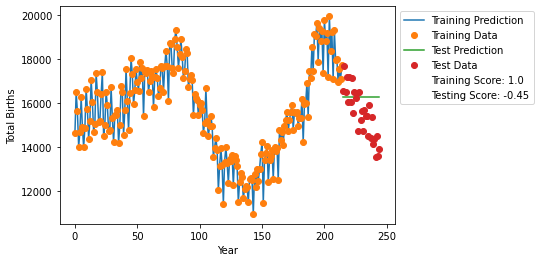

In [34]:
mlr.linear(X_oh, y)

Path to save plot: 


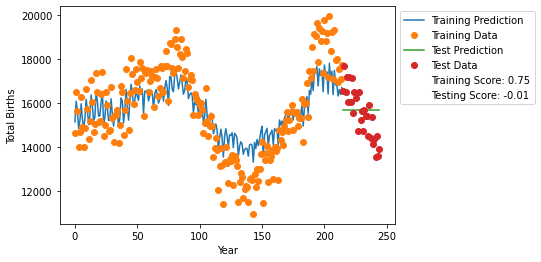

In [35]:
mlr.ridge(X_oh, y)

In [36]:
# mlr.polynomial(X_oh, y)

The polynomial regression of the encoded data didn't work here it causes the programme to crash. Most likely due to the number of coefficients it is trying to calculate.

## One Hot Encoded X where X is quarters only

In [37]:
X_oh_q = enc.fit_transform(X_q).toarray()

Path to save plot: 


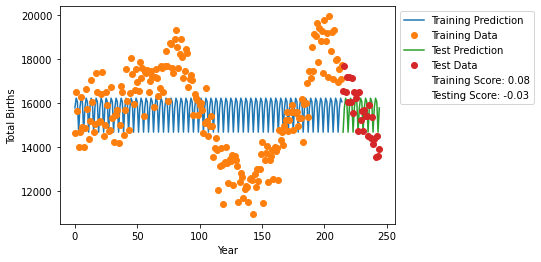

In [38]:
mlr.forest(X_oh_q, y)

Path to save plot: 


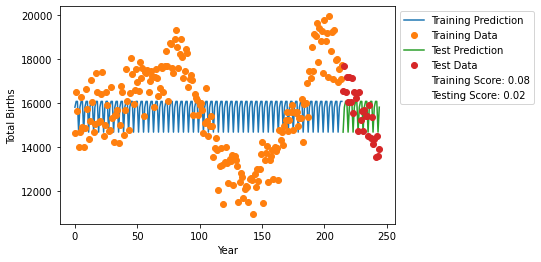

In [39]:
mlr.linear(X_oh_q, y)

Path to save plot: 


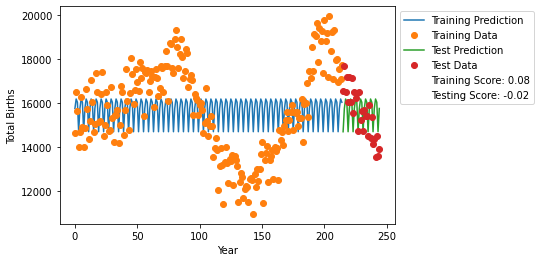

In [40]:
mlr.ridge(X_oh_q, y)

Path to save plot: 


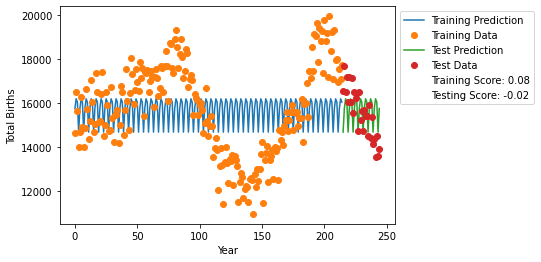

In [41]:
mlr.polynomial(X_oh_q, y)

Path to save plot: 


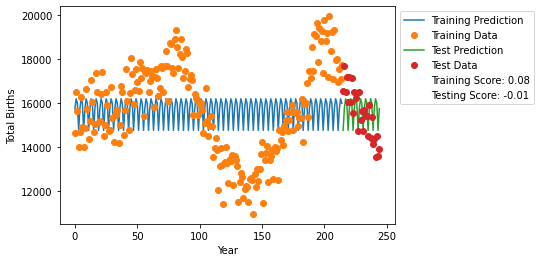

In [42]:
mlr.polynomial(X_oh_q, y, degree=5)

Path to save plot: 


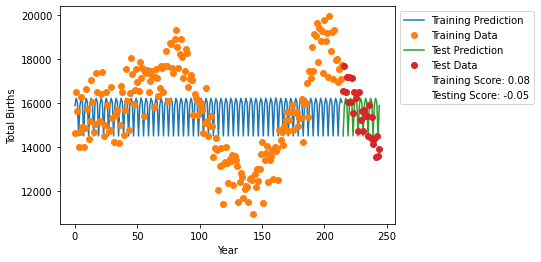

In [43]:
mlr.polynomial(X_oh_q, y, degree=7)

## One Hot Encoded X where X is quarters & years

In [44]:
X_oh_qy = enc.fit_transform(X_qy).toarray()

Path to save plot: 


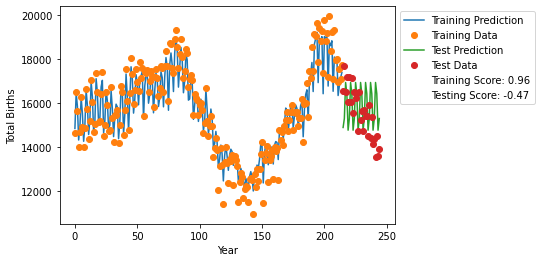

In [45]:
mlr.forest(X_oh_qy, y)

Path to save plot: 


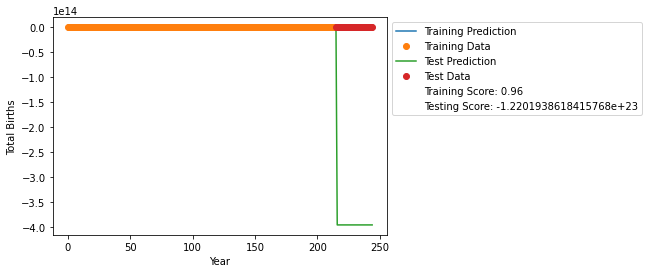

In [46]:
mlr.linear(X_oh_qy, y)

Path to save plot: 


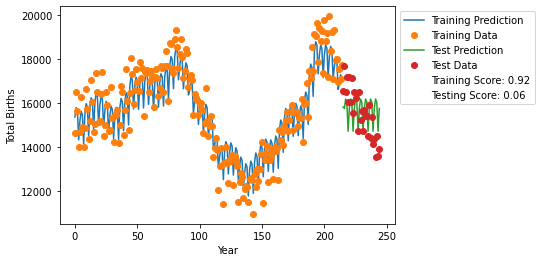

In [47]:
mlr.ridge(X_oh_qy, y)

Path to save plot: 


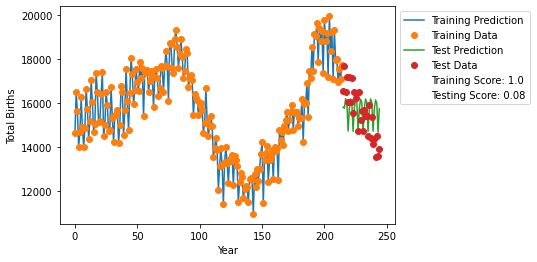

In [48]:
mlr.polynomial(X_oh_qy, y)

In [49]:
# mlr.polynomial(X_oh_qy, y, degree=5)

Here we ran into the memory problem again.

## One Hot Encoded X where X is days, weeks, months, quarters & years

In [50]:
X_all = np.hstack([df.index.year.values.reshape(-1,1),
                   df.index.quarter.values.reshape(-1,1),
                   df.index.month.values.reshape(-1,1),
                   df.index.week.values.reshape(-1,1),
                   df.index.day_of_week.values.reshape(-1,1)
                  ])

<ipython-input-50-f1704e5e938f>:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df.index.week.values.reshape(-1,1),


In [51]:
X_oh_all = enc.fit_transform(X_all).toarray()

Path to save plot: 


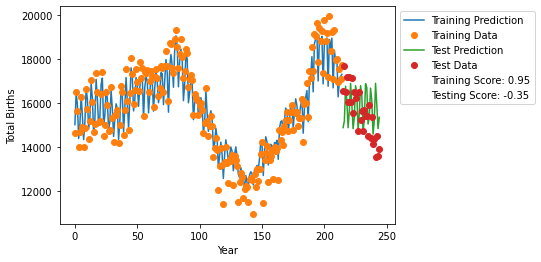

In [52]:
mlr.forest(X_oh_all, y)

Path to save plot: 


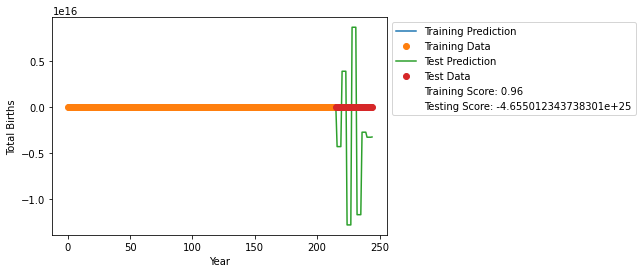

In [53]:
mlr.linear(X_oh_all, y)

Path to save plot: 


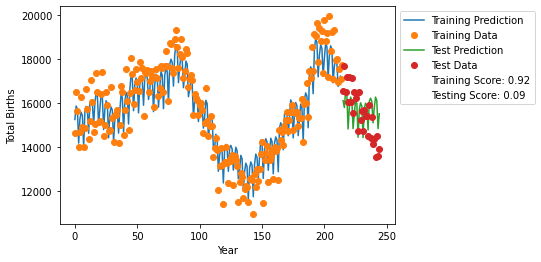

In [54]:
mlr.ridge(X_oh_all, y)

Path to save plot: 


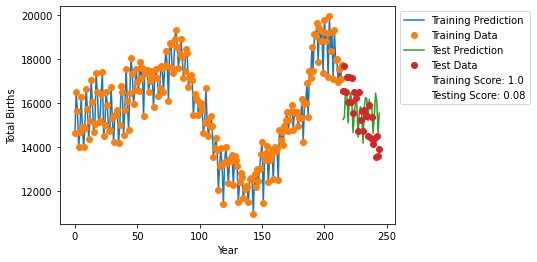

In [55]:
mlr.polynomial(X_oh_all, y)

This cell took a while to run. Chances are that setting the degree > 3 will cause the programme to crash so let's not do that.

## Scaled X where X is seconds only

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
X_std = StandardScaler().fit_transform(X)
y_std = StandardScaler().fit_transform(y.values.reshape(-1,1))
y_std = np.reshape(y_std, 245)

Path to save plot: 


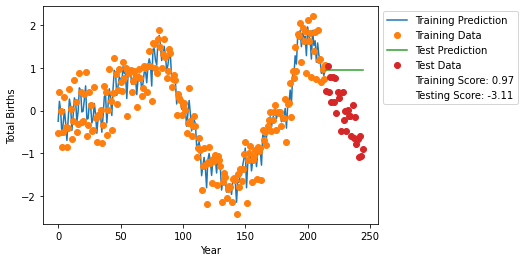

In [58]:
mlr.forest(X_std, y_std)

Path to save plot: 


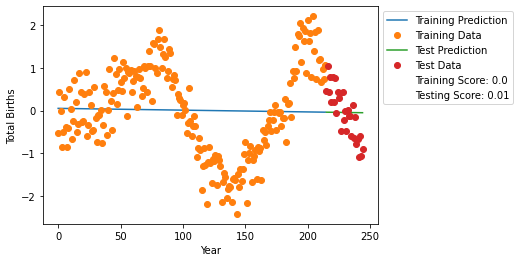

In [59]:
mlr.linear(X_std, y_std)

Path to save plot: 


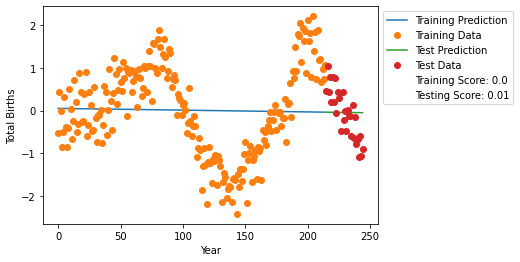

In [60]:
mlr.ridge(X_std, y_std)

Path to save plot: 


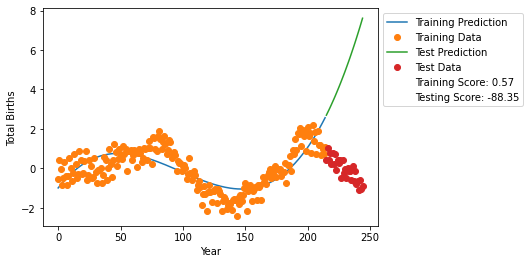

In [61]:
mlr.polynomial(X_std, y_std)

Path to save plot: 


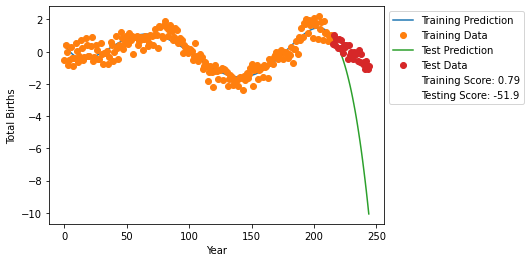

In [62]:
mlr.polynomial(X_std, y_std, degree=5)

Path to save plot: 


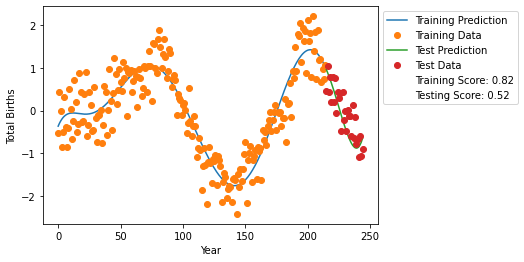

In [63]:
mlr.polynomial(X_std, y_std, degree=7)

## Scaled X where X is quarters only

In [64]:
X_std_q = StandardScaler().fit_transform(X_q)

Path to save plot: 


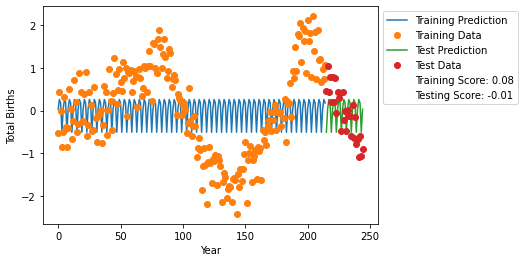

In [65]:
mlr.forest(X_std_q, y_std)

Path to save plot: 


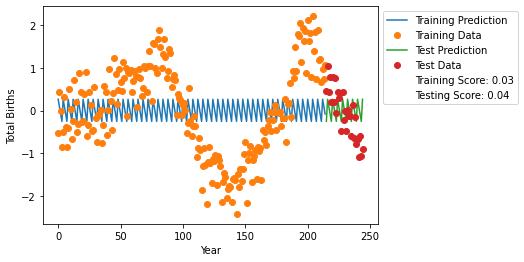

In [66]:
mlr.linear(X_std_q, y_std)

Path to save plot: 


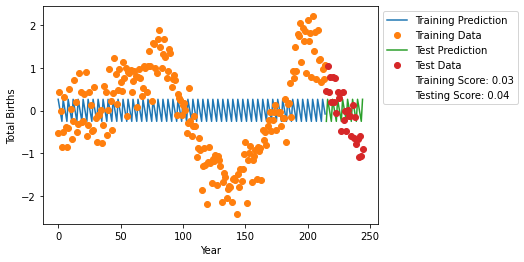

In [67]:
mlr.ridge(X_std_q, y_std)

Path to save plot: 


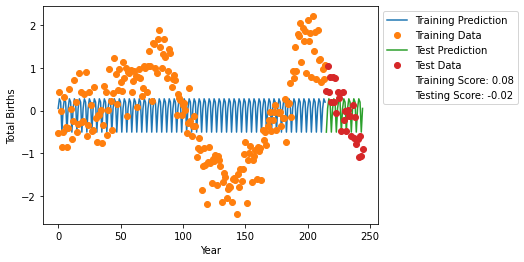

In [68]:
mlr.polynomial(X_std_q, y_std)

Path to save plot: 


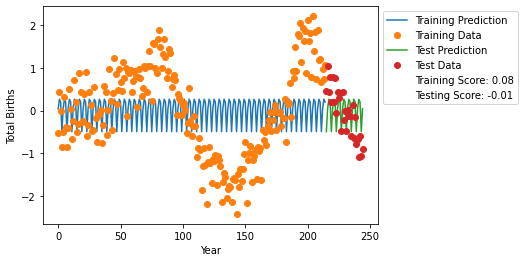

In [69]:
mlr.polynomial(X_std_q, y_std, degree=5)

Path to save plot: 


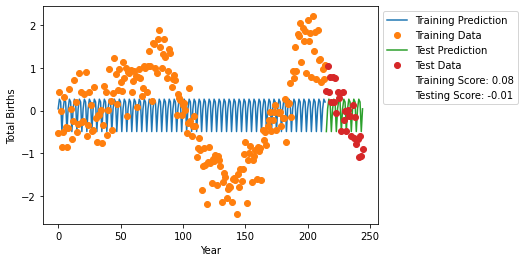

In [70]:
mlr.polynomial(X_std_q, y_std, degree=7)

## Scaled X where X is quarters and years

In [71]:
X_std_qy = StandardScaler().fit_transform(X_qy)

Path to save plot: 


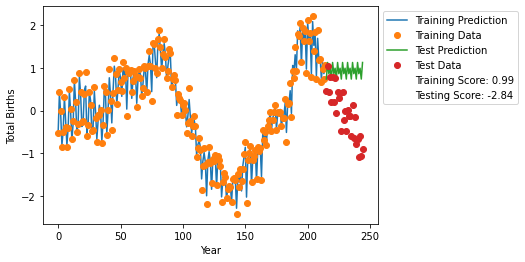

In [72]:
mlr.forest(X_std_qy, y_std)

Path to save plot: 


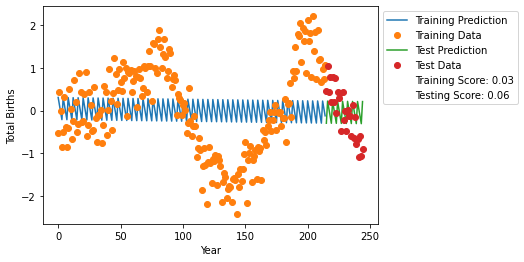

In [73]:
mlr.linear(X_std_qy, y_std)

Path to save plot: 


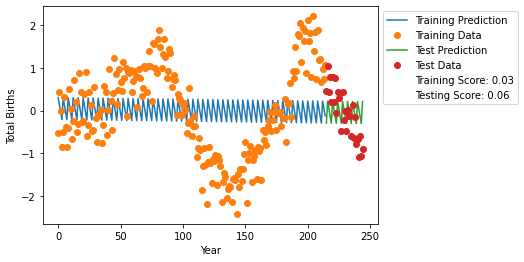

In [74]:
mlr.ridge(X_std_qy, y_std)

Path to save plot: 


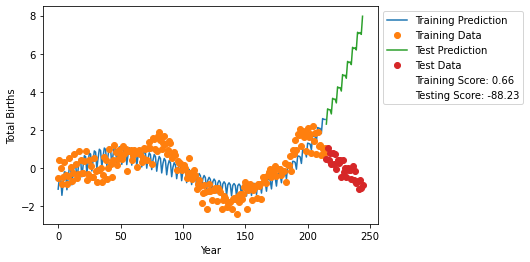

In [75]:
mlr.polynomial(X_std_qy, y_std)

Path to save plot: 


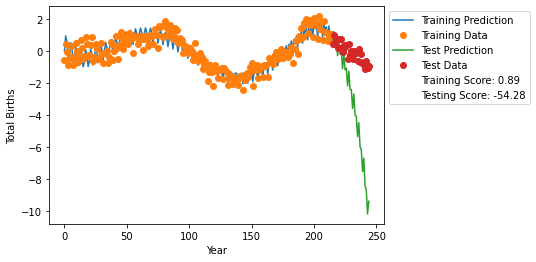

In [76]:
mlr.polynomial(X_std_qy, y_std, degree=5)

Path to save plot: 


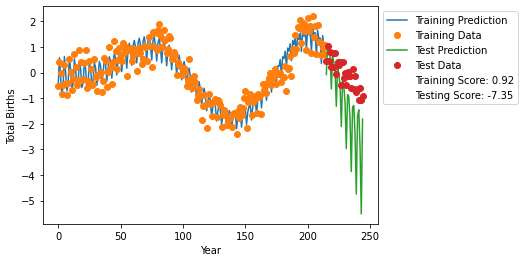

In [77]:
mlr.polynomial(X_std_qy, y_std, degree=7)

## Scaled X where X is days, weeks, months, quarters & years

In [78]:
X_std_all = StandardScaler().fit_transform(X_all)

Path to save plot: 


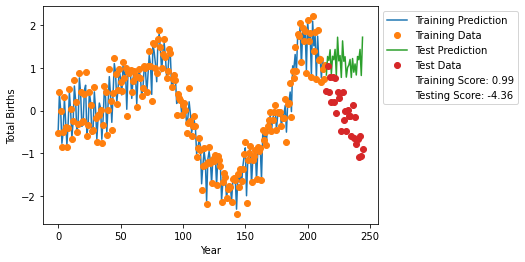

In [79]:
mlr.forest(X_std_all, y_std)

Path to save plot: 


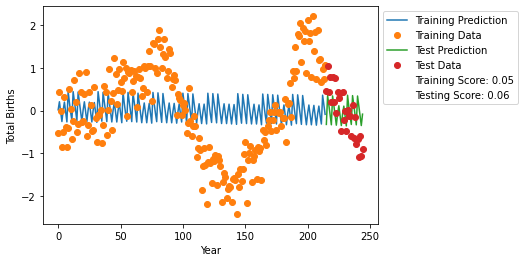

In [80]:
mlr.linear(X_std_all, y_std)

Path to save plot: 


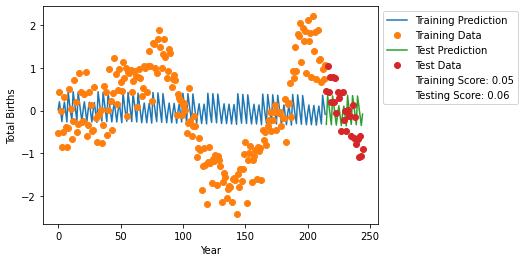

In [81]:
mlr.ridge(X_std_all, y_std)

Path to save plot: 


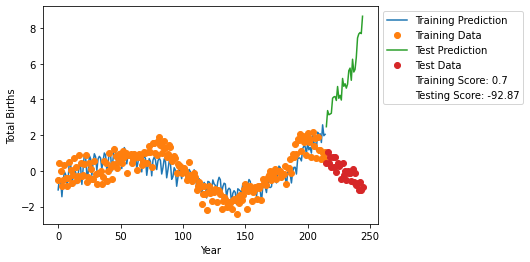

In [82]:
mlr.polynomial(X_std_all, y_std)

Path to save plot: 


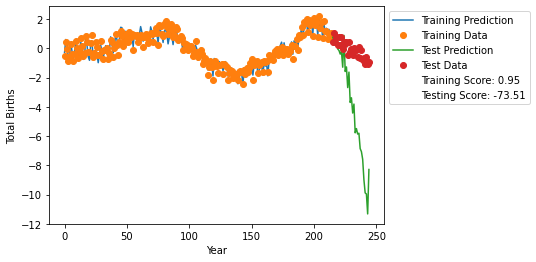

In [83]:
mlr.polynomial(X_std_all, y_std, degree=5)

Path to save plot: 


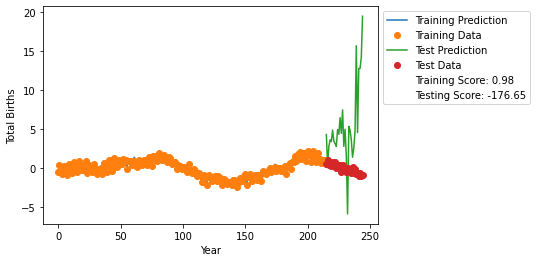

In [84]:
mlr.polynomial(X_std_all, y_std, degree=7)

## Scaled X where X is One Hot Encoded seconds only

In [85]:
X_std_oh = StandardScaler().fit_transform(X_oh)

Path to save plot: 


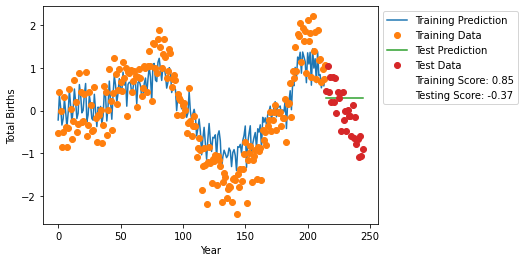

In [86]:
mlr.forest(X_std_oh, y_std)

Path to save plot: 


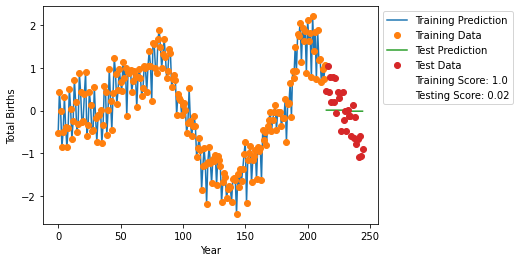

In [87]:
mlr.linear(X_std_oh, y_std)

Path to save plot: 


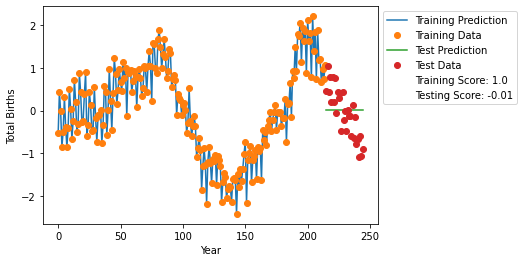

In [88]:
mlr.ridge(X_std_oh, y_std)

In [89]:
# mlr.polynomial(X_std_oh, y_std)

Here's our memory error cropping up again

## Scaled X where X is One Hot Encoded quarters only

In [90]:
X_std_oh_q = StandardScaler().fit_transform(X_oh_q)

Path to save plot: 


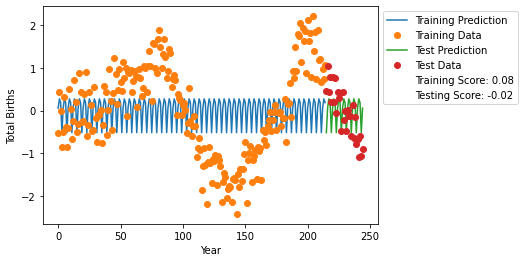

In [91]:
mlr.forest(X_std_oh_q, y_std)

Path to save plot: 


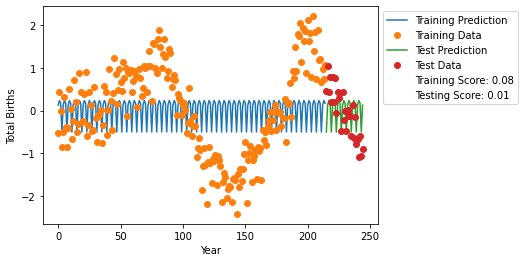

In [92]:
mlr.linear(X_std_oh_q, y_std)

Path to save plot: 


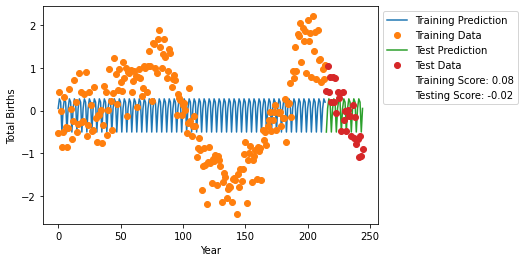

In [93]:
mlr.ridge(X_std_oh_q, y_std)

Path to save plot: 


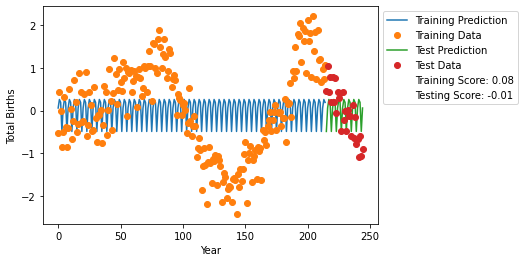

In [94]:
mlr.polynomial(X_std_oh_q, y_std)

Path to save plot: 


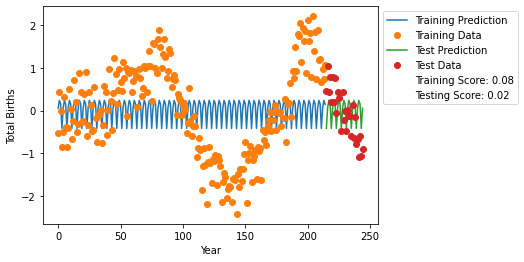

In [95]:
mlr.polynomial(X_std_oh_q, y_std, degree=5)

Path to save plot: 


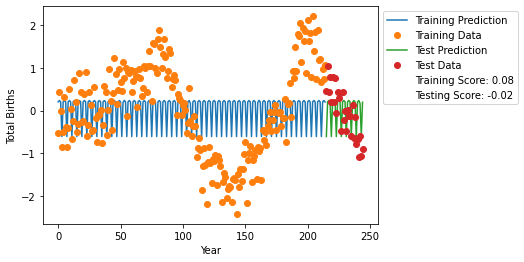

In [96]:
mlr.polynomial(X_std_oh_q, y_std, degree=7)

## Scaled X where X is One Hot Encoded quarters and years

In [97]:
X_std_oh_qy = StandardScaler().fit_transform(X_oh_qy)

Path to save plot: 


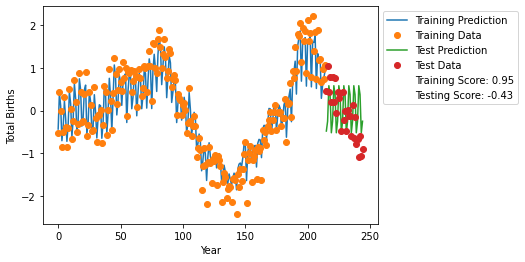

In [98]:
mlr.forest(X_std_oh_qy, y_std)

Path to save plot: 


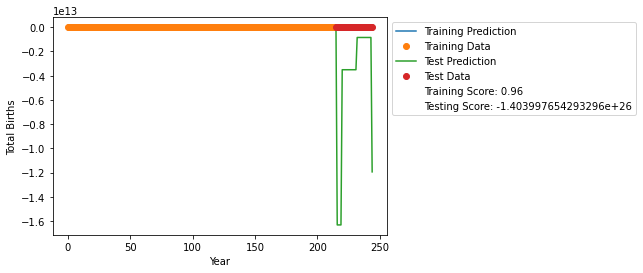

In [99]:
mlr.linear(X_std_oh_qy, y_std)

Path to save plot: 


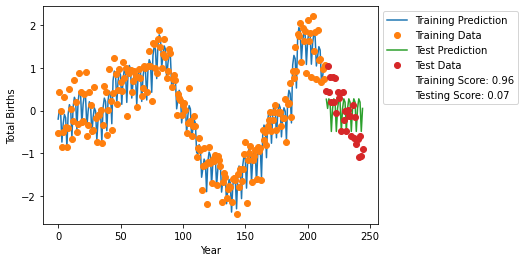

In [100]:
mlr.ridge(X_std_oh_qy, y_std)

Path to save plot: 


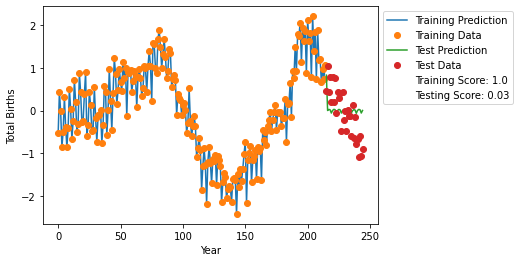

In [101]:
mlr.polynomial(X_std_oh_qy, y_std)

Slow to run again. Probable memory issue for degree > 3 here.

## Scaled X where X is One Hot Encoded days, weeks, months, quarters & years

In [102]:
X_std_oh_all = StandardScaler().fit_transform(X_oh_all)

Path to save plot: 


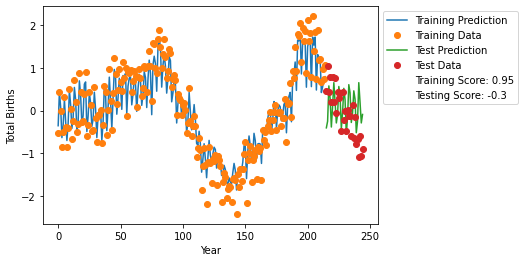

In [103]:
mlr.forest(X_std_oh_all, y_std)

Path to save plot: 


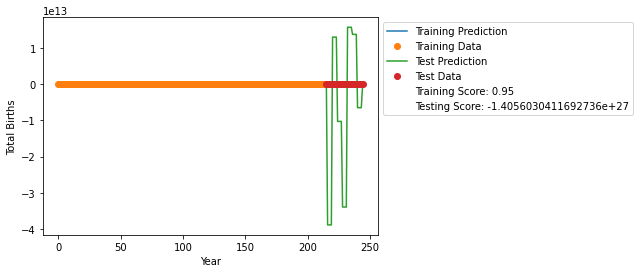

In [104]:
mlr.linear(X_std_oh_all, y_std)

Path to save plot: 


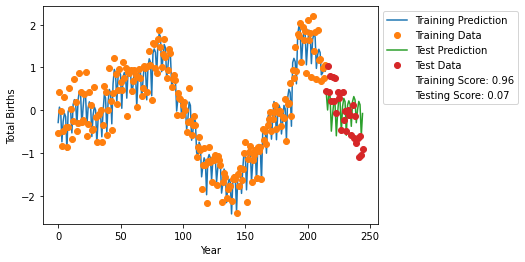

In [105]:
mlr.ridge(X_std_oh_all, y_std)

Path to save plot: 


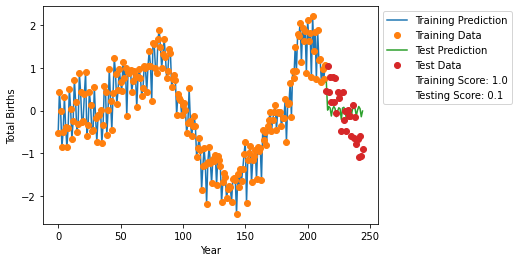

In [106]:
mlr.polynomial(X_std_oh_all, y_std)

Very slow again. Probable memory error.

## Result

The best result of the lot was with a polynomial regression of degree 7 where X was scaled seconds only. This gave us a training score of 0.82 and aa testing score of 0.52.\
A table can be seen in the accompanying .xlsx spreadsheet.